<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Datos Atípicos </font> </center>

## ¿Qué son los valores atípicos (outliers)?

Un valor atípico es una observación que es diferente a las demás. Es raro, o distinto, o no encaja de alguna manera. También se les llama anomalías.

Los valores atípicos pueden suceder por varias causas, tales como:

- Error de medición o entrada.
- Corrupción de datos.
- Observación verdaderamente atípica.

Incluir valores atípicos en modelos basados en datos puede ser riesgoso. La existencia de un solo valor extremo engañoso tiene el potencial de cambiar la conclusión que implica el modelo. Por lo tanto, es importante gestionar ese tipo de riesgo.

> No hay una forma precisa de definir e identificar valores atípicos en general debido a las particularidades de cada conjunto de datos. En su lugar, se puede interpretar las observaciones y decidir si un valor es atípico o no.

> Podemos usar métodos estadísticos para identificar observaciones que parecen ser raras o poco probables dado los datos disponibles. Esto no significa que los valores identificados sean atípicos y deban eliminarse.

> Un buen consejo es considerar graficar los valores atípicos identificados, quizás en el contexto de los valores no atípicos para ver si hay relaciones o patrones sistemáticos. Si los hay, tal vez no sean atípicos y puedan explicarse, o tal vez los propios valores atípicos puedan identificarse de manera más sistemática.

#### Tipos de Valores atípicos

Un valor atípico puede ser de dos tipos:

1. Univariado
2. Multivariado

Los valores atípicos univariados pueden encontrarse al observar la distribución de una sola variable. Los valores atípicos multivariados son valores atípicos en un espacio n-dimensional. Para encontrarlos, debes observar distribuciones en varias dimensiones.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline

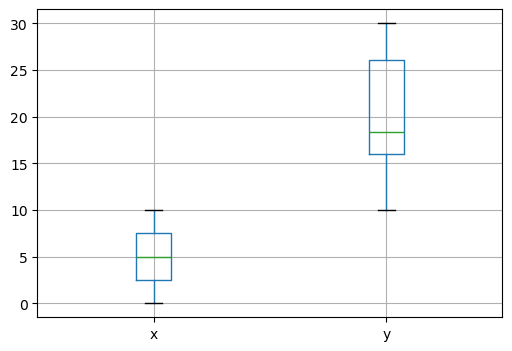

In [2]:
N = 20
x = np.linspace(0, 10, N)
y = 10 + 2 * x + np.random.normal(loc=0, scale=2, size=(N,))
y[0] = 30
y[-1] = 10

df_xy = pd.DataFrame({'x': x, 'y': y})
#distribuciones de x, y
plt.figure(figsize=(6,4))
df_xy.boxplot(figsize=(6,5));
plt.show()

In [4]:
df_xy

,x,y
0,0.000000,30.000000
1,0.526316,10.610222
2,1.052632,17.609314
3,1.578947,11.523800
4,2.105263,16.364191
5,2.631579,15.061216
6,3.157895,14.750605
7,3.684211,17.799228
8,4.210526,18.527411
9,4.736842,18.117294


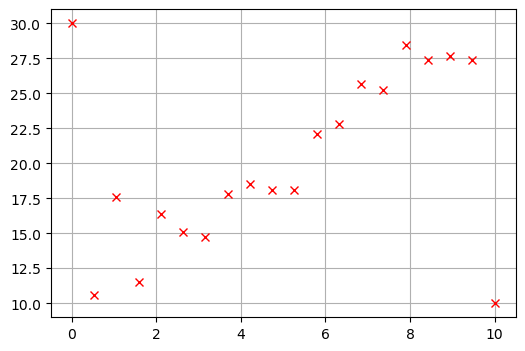

In [5]:
# Relación entre x, y
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')
plt.grid()
plt.show()

Existen diversas técnicas para identificar valores atípicos en un conjunto de datos, incluyendo métodos de **inspección visual, métodos estadísticos e incluso modelos de machine learning como el Local Outlier Factor (LOF), el Isolation Forest (IForest)**.


### Outliers Univariados

Las metodologías más comunes para detectarlos son:

1. Método del Rango Intercuantílico (IQR)
2. Método de la desviación estándar
3. Método de la puntuación Z, Z-score modificada

#### Método del Rango Intercuantílico (IQR)

El concepto de rango intercuartílico (IQR) se utiliza para construir los diagramas de caja. El IQR es un concepto en estadística que se utiliza para medir la dispersión y variabilidad de los datos dividiendo el conjunto en cuartiles.

Cualquier conjunto de datos u observaciones se divide en cuatro intervalos definidos según los valores de los datos y cómo se comparan con el conjunto completo. Un cuartil es lo que divide los datos en tres puntos y cuatro intervalos.

$IQR$ es la diferencia entre el tercer cuartil y el primer cuartil ($IQR = Q_3 - Q_1$). Los valores atípicos en este caso se definen como las observaciones que están por debajo de ($Q1 − 1.5*IQR$) o el bigote inferior del diagrama de caja, o por encima de ($Q3 + 1.5* IQR$) o el bigote superior. Puede representarse visualmente mediante el diagrama de caja.

In [6]:
from sklearn.datasets import load_iris

LI=load_iris()
df=pd.DataFrame(LI.data,columns=LI.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


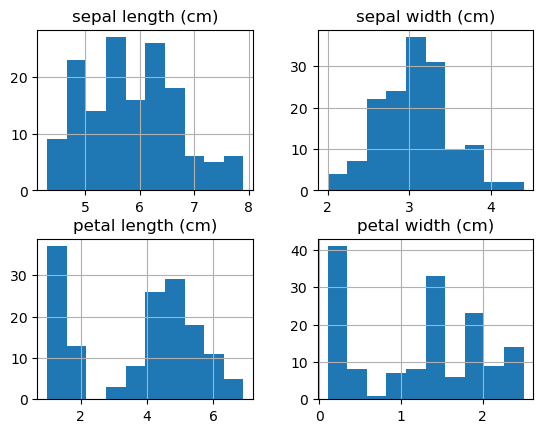

In [7]:
df.hist()
plt.show()

In [8]:
df['sepal width (cm)'].values

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [9]:
q3,q1=np.quantile(df,(0.75,0.25),axis=0)
iqr=q3-q1
iqr

array([1.3, 0.5, 3.5, 1.5])

In [10]:
Li=q1-1.5*iqr
Ls=q3+1.5*iqr
Li

array([ 3.15,  2.05, -3.65, -1.95])

In [11]:
Ls

array([ 8.35,  4.05, 10.35,  4.05])

In [12]:
(df.iloc[:,1] < Li[1]) | (df.iloc[:,1] > Ls[1] ) #Outliers para sepal width (cm)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal width (cm), Length: 150, dtype: bool

In [13]:
spel_width_outliers = df[(df.iloc[:,1] < Li[1]) | (df.iloc[:,1] > Ls[1] )]['sepal width (cm)'] #Outliers para sepal length (cm)
spel_width_outliers

15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal width (cm), dtype: float64

In [14]:
spel_width_woutliers = df[~((df.iloc[:,1] < Li[1]) | (df.iloc[:,1] > Ls[1] ))]['sepal width (cm)']

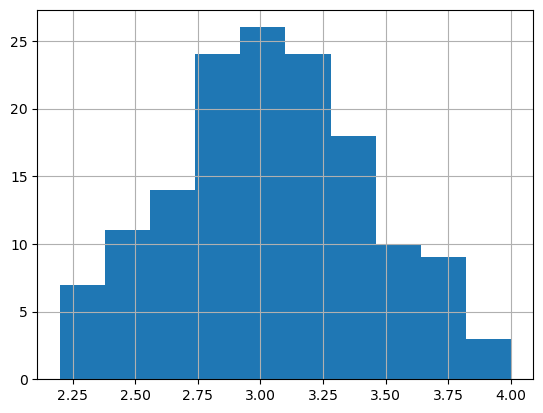

In [15]:
spel_width_woutliers.hist()
plt.show()

In [16]:
def MetodoIQR (df,n,features):
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # limite iqr
        outlier_limit = 1.5 * IQR
        
        # determinar la lista de outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_limit) | (df[column] > Q3 + outlier_limit )].index
        
        # agregando a la lista de outliers
        outlier_list.extend(outlier_list_column)
        
    # seleccionar las observaciones que contienen más de cierto numero de outliers
    outlier_list = Counter(outlier_list)
    print(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v >= n )
    
    return multiple_outliers

In [17]:
outliers_index = MetodoIQR(df, 1, df.columns)
outliers_index

Counter({15: 1, 32: 1, 33: 1, 60: 1})


[15, 32, 33, 60]

### Método de la desviación estándar

Si sabemos que la distribución de los valores en la muestra es gaussiana o similar a la gaussiana, podemos usar la desviación estándar de la muestra como un límite para identificar valores atípicos.

La desviación estándar muestra cuánto se dispersan los puntos de datos individuales respecto a la media. Si la distribución de los datos es normal entonces:
* El 68% de los valores de los datos se encuentran dentro de una desviación estándar de la media
* El 95% están dentro de dos desviaciones estándar
* El 99.7% se encuentran dentro de tres desviaciones estándar.

Dependiendo de la especificación establecida, ya sea a 2 o 3 veces la desviación estándar, podemos detectar y eliminar valores atípicos del conjunto de datos.

Este método puede fallar en la detección de valores atípicos porque los valores atípicos aumentan la desviación estándar. Cuanto más extremo sea el valor atípico, más se ve afectada la desviación estándar.

<img src="Figures/Standard_deviation_diagram.svg" width="800" height="800">


In [18]:
# El conjunto de datos contiene transacciones realizadas con tarjetas de crédito. Contiene únicamente variables de entrada numéricas que son el resultado de una transformación PCA.
df_credit = pd.read_csv('Data/creditcard.csv') 
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
df_credit.columns[:-1]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [20]:
feature_list = df_credit.columns[:-1].to_list()

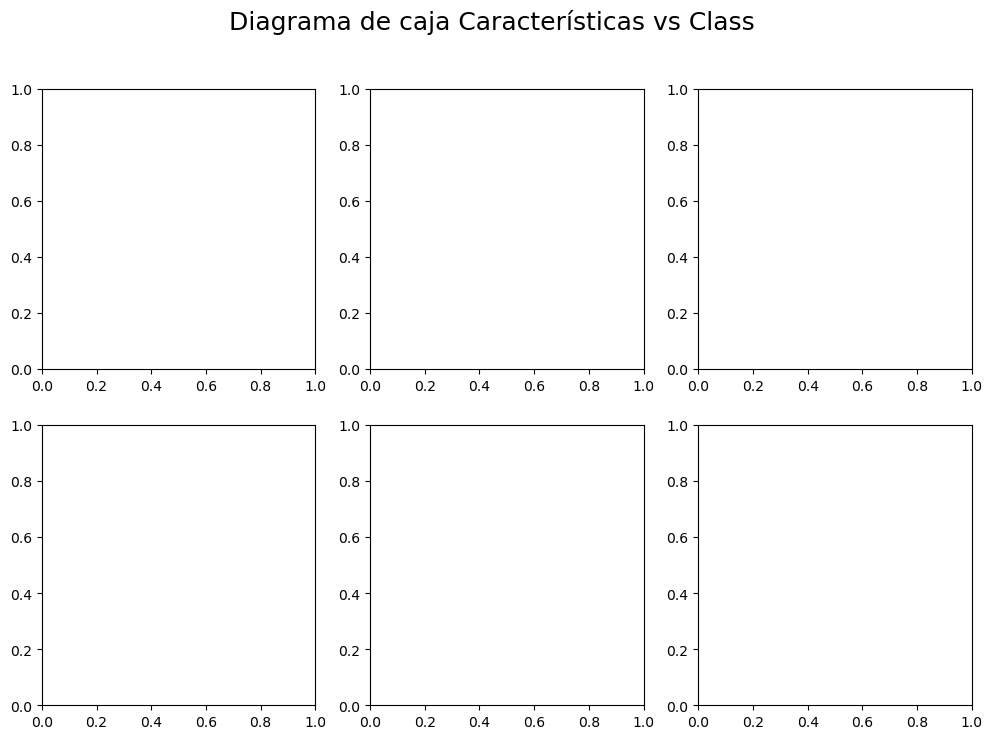

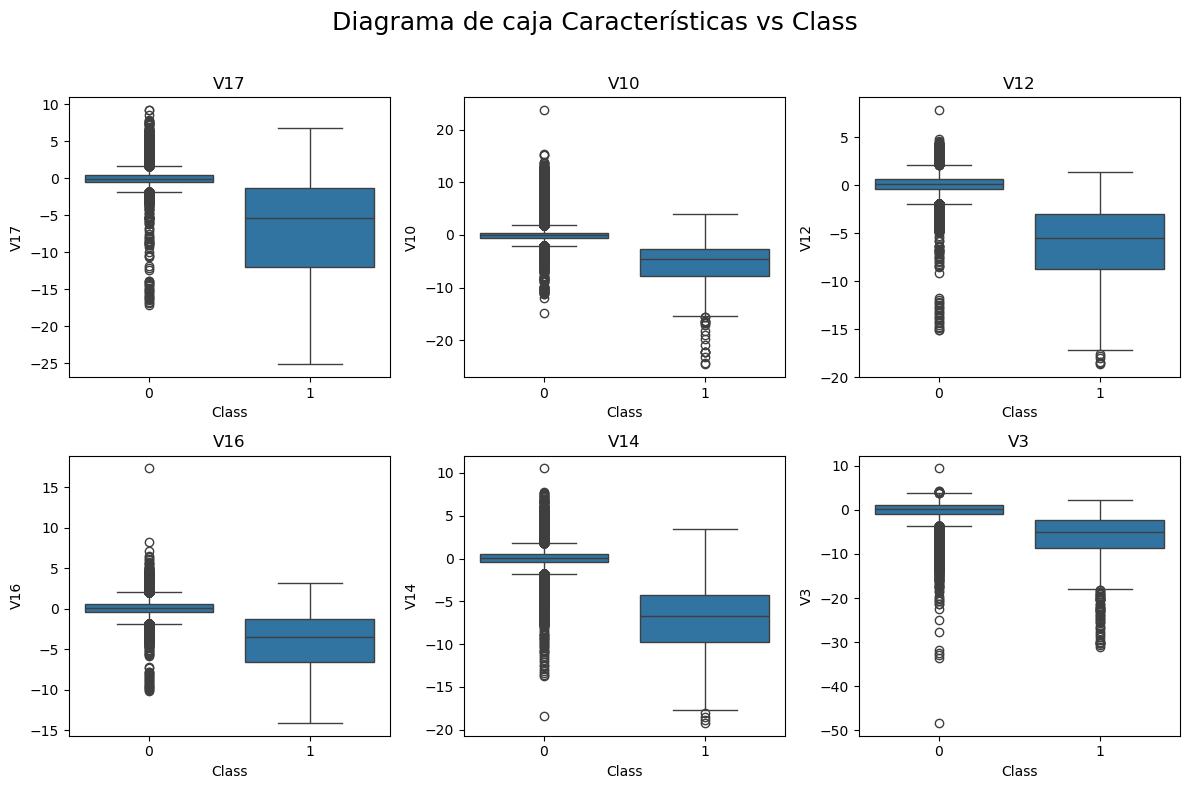

In [22]:
#Ploteamos los diagramas de caja de algunas características
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,8))
fig.suptitle('Diagrama de caja Características vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df_credit, x='Class', y='V17')
axes[0,0].set_title("V17");

sns.boxplot(ax=axes[0, 1], data=df_credit, x='Class', y='V10')
axes[0,1].set_title("V10");

sns.boxplot(ax=axes[0, 2], data=df_credit, x='Class', y='V12')
axes[0,2].set_title("V12");

sns.boxplot(ax=axes[1, 0], data=df_credit, x='Class', y='V16')
axes[1,0].set_title("V16");

sns.boxplot(ax=axes[1, 1], data=df_credit, x='Class', y='V14')
axes[1,1].set_title("V14");

sns.boxplot(ax=axes[1, 2], data=df_credit, x='Class', y='V3')
axes[1,2].set_title("V3");

plt.tight_layout()
plt.show()

In [27]:
df_credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

The lower bound value is: -3.266549296207551
The upper bound value is: 3.2665492962075553


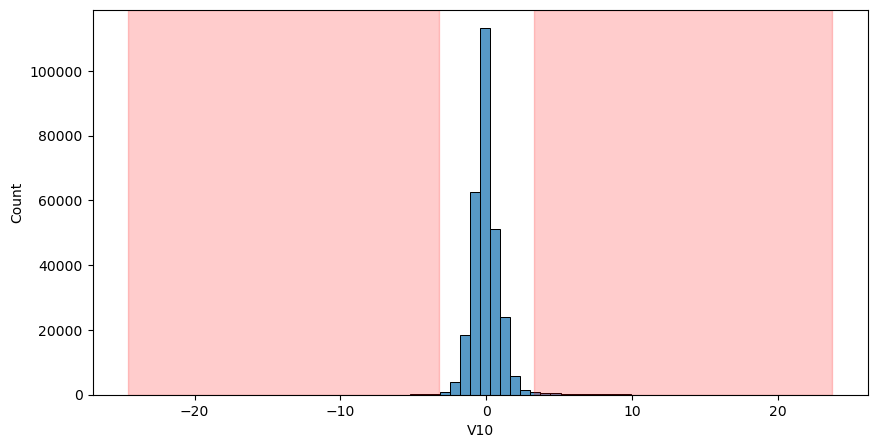

In [28]:
data_mean, data_std = df_credit['V10'].mean(), df_credit['V10'].std()
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

print('The lower bound value is:', data_mean - cut_off)
print('The upper bound value is:', data_mean + cut_off)

plt.figure(figsize = (10,5))
sns.histplot(x = 'V10', data=df_credit, bins=70)
plt.axvspan(xmin = lower,xmax= df_credit.V10.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_credit.V10.max(),alpha=0.2, color='red')
plt.show()


In [30]:
def Metodo_StDev(df,n,features):
    outlier_indices = []
    
    for column in features:
        # calcula la media y la desviación estándar de todo el dataframe
        data_mean = df[column].mean()
        data_std = df[column].std()
        
        # calcula el corte en la desviación estandar
        cut_off = data_std * 3
        
        # Determina la lista de indices de los outliers en cada columns
        outlier_list_column = df[(df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        
        #Agrega los indices de los outliers obtenidos 
        outlier_indices.extend(outlier_list_column)
        
    # Selecciona las observaciones que contienen más de x outliers
    outlier_ind = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_ind.items() if v > n )
    
    return multiple_outliers   

In [34]:
outliers_StDev = Metodo_StDev(df_credit,1,df_credit.columns) #Indices que representan outliers

In [36]:
outliers_StDev

[164,
 1158,
 1632,
 2464,
 2682,
 2792,
 2957,
 2963,
 3509,
 3554,
 4235,
 4608,
 5296,
 5371,
 5425,
 5534,
 5535,
 5715,
 5797,
 5888,
 6223,
 6467,
 6501,
 6624,
 6727,
 6783,
 6812,
 6905,
 6969,
 7080,
 7081,
 7090,
 7104,
 7144,
 7178,
 7246,
 7255,
 7277,
 7348,
 7420,
 7485,
 7522,
 7523,
 7560,
 7578,
 7580,
 7616,
 7617,
 7743,
 7744,
 8447,
 8487,
 8572,
 8610,
 8683,
 8820,
 8855,
 8973,
 9106,
 9119,
 9545,
 9895,
 10115,
 10131,
 10460,
 10483,
 10515,
 10535,
 10567,
 10573,
 10582,
 10584,
 10607,
 10690,
 10801,
 10804,
 10891,
 10897,
 10900,
 10913,
 11033,
 11222,
 11300,
 11343,
 11364,
 11465,
 11681,
 11710,
 11841,
 11842,
 11880,
 11891,
 11956,
 12021,
 12034,
 12070,
 12108,
 12117,
 12139,
 12156,
 12184,
 12225,
 12229,
 12234,
 12237,
 12240,
 12255,
 12258,
 12261,
 12270,
 12271,
 12284,
 12325,
 12328,
 12369,
 12386,
 12402,
 12468,
 12477,
 12499,
 12533,
 12635,
 12707,
 12721,
 12759,
 12832,
 12851,
 12922,
 12938,
 12943,
 12956,
 12976,
 12994,

In [37]:
df_credit_wout = df_credit.drop(outliers_StDev, axis = 0).reset_index(drop=True)
df_credit_wout.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


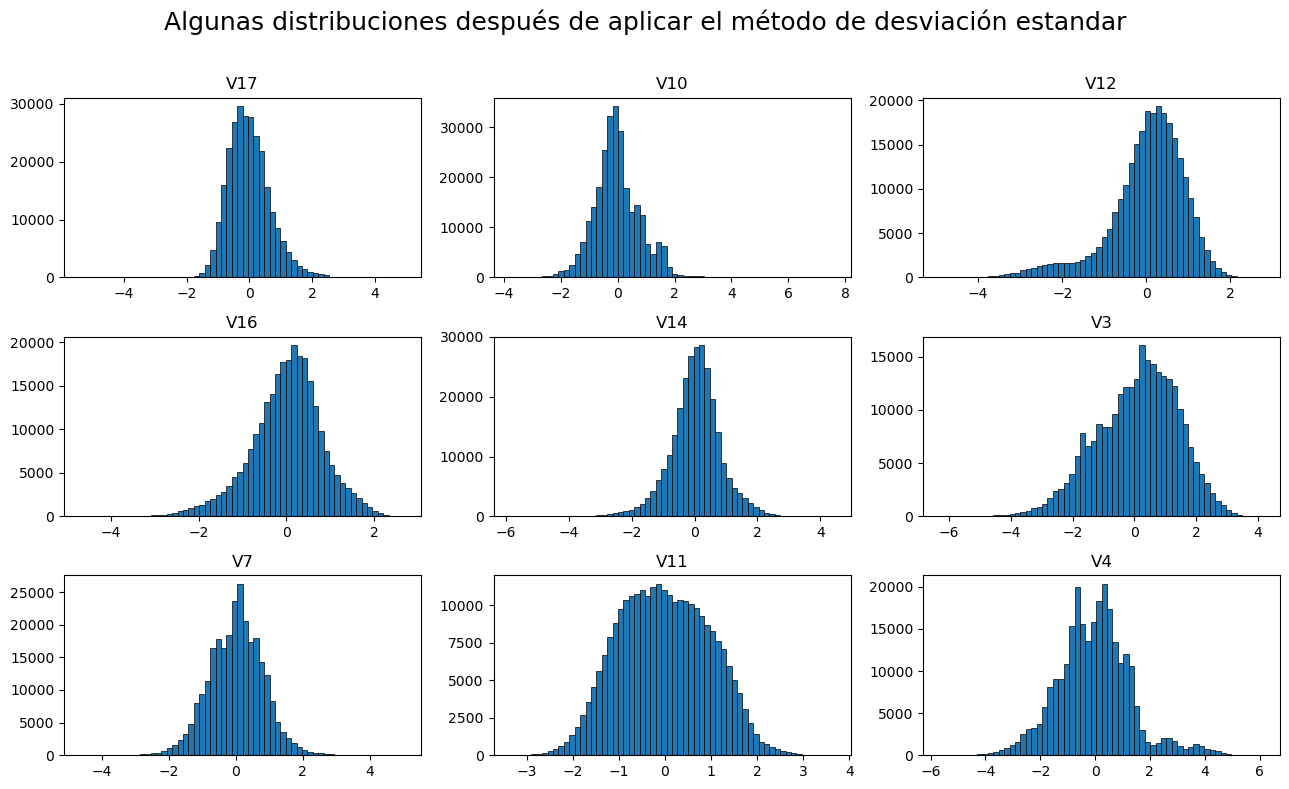

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))
fig.suptitle('Algunas distribuciones después de aplicar el método de desviación estandar\n', size = 18)

axes[0,0].hist(df_credit_wout['V17'], bins=60, linewidth=0.5, edgecolor="black")
axes[0,0].set_title("V17");

axes[0,1].hist(df_credit_wout['V10'], bins=60, linewidth=0.5, edgecolor="black")
axes[0,1].set_title("V10");

axes[0,2].hist(df_credit_wout['V12'], bins=60, linewidth=0.5, edgecolor="black")
axes[0,2].set_title("V12");

axes[1,0].hist(df_credit_wout['V16'], bins=60, linewidth=0.5, edgecolor="black")
axes[1,0].set_title("V16");

axes[1,1].hist(df_credit_wout['V14'], bins=60, linewidth=0.5, edgecolor="black")
axes[1,1].set_title("V14");

axes[1,2].hist(df_credit_wout['V3'], bins=60, linewidth=0.5, edgecolor="black")
axes[1,2].set_title("V3");

axes[2,0].hist(df_credit_wout['V7'], bins=60, linewidth=0.5, edgecolor="black")
axes[2,0].set_title("V7");

axes[2,1].hist(df_credit_wout['V11'], bins=60, linewidth=0.5, edgecolor="black")
axes[2,1].set_title("V11");

axes[2,2].hist(df_credit_wout['V4'], bins=60, linewidth=0.5, edgecolor="black")
axes[2,2].set_title("V4");

plt.tight_layout()
plt.show()

### Método de puntuación Z (Z-score)

Al calcular el **Z-Score** (puntuación Z) se utiliza para convertir los datos en otro conjunto con media = 0, describe la posición de un valor bruto en términos de su distancia respecto a la media, medida en unidades de desviación estándar.

Esta técnica asume una **distribución gaussiana** de los datos. Los valores atípicos serán los datos que están en las colas de la distribución. En la mayoría de los casos se utiliza un umbral de 3 o -3, es decir, si el valor de la puntuación Z es mayor o menor que 3 o -3 respectivamente, ese punto de datos será identificado como valor atípico.

In [39]:
df_taxis = sns.load_dataset('taxis')
df_taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


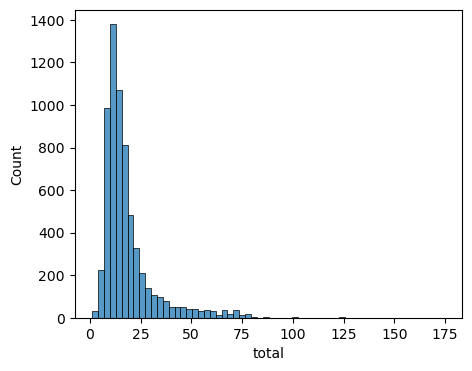

In [40]:
# Usando un método de visualización (histograma)
plt.figure(figsize=(5,4))
sns.histplot(data=df_taxis, x = 'total', bins=60, linewidth=0.5, edgecolor="black")
plt.show()

In [41]:
z_score =  (df_taxis['total'] - df_taxis['total'].mean())/df_taxis['total'].std()
z_score

0      -0.403009
1      -0.667203
2      -0.315426
3       1.334162
4      -0.370437
          ...   
6428   -0.880007
6429    2.915711
6430   -0.088147
6431   -0.848159
6432    0.118866
Name: total, Length: 6433, dtype: float64

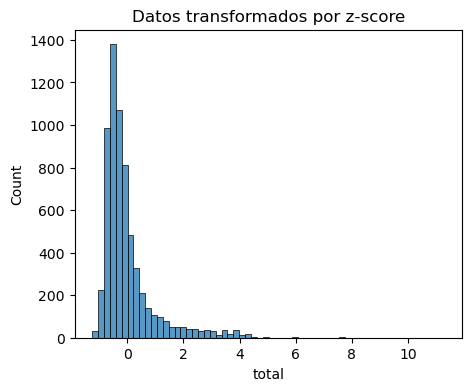

In [42]:
plt.figure(figsize=(5,4))
sns.histplot(data=z_score, bins=60, linewidth=0.5, edgecolor="black")
plt.title("Datos transformados por z-score")
plt.show()

In [43]:
z_score_abs = abs(z_score)
outliers_zscore = z_score_abs > 3 #+- 3 veces
outliers_zscore

0       False
1       False
2       False
3       False
4       False
        ...  
6428    False
6429    False
6430    False
6431    False
6432    False
Name: total, Length: 6433, dtype: bool

In [44]:
df_taxis[~outliers_zscore]['total'] 

0       12.95
1        9.30
2       14.16
3       36.95
4       13.40
        ...  
6428     6.36
6429    58.80
6430    17.30
6431     6.80
6432    20.16
Name: total, Length: 6248, dtype: float64

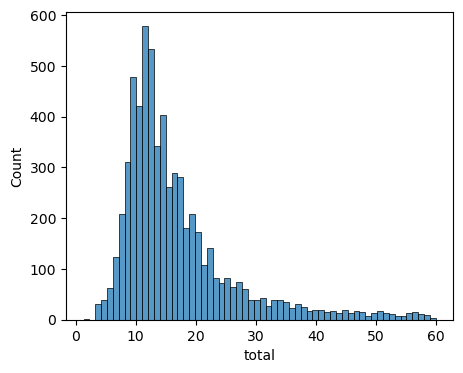

In [45]:
plt.figure(figsize=(5,4))
sns.histplot(data=df_taxis[~outliers_zscore]['total'], bins=60, linewidth=0.5, edgecolor="black")
plt.show()

In [46]:
def Metodo_Z_score (df,n,features):
    outlier_list = []
    
    for column in features:
        # Calculando la media y la desviación estándar de cada característica
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3
        
        z_score = abs( (df[column] - data_mean)/data_std )
        
        # Determinando los indices que corresponden a los outliers 
        outlier_list_column =  df[z_score > threshold].index
        
        # Añadiendo los indices que corresponden a los outliers
        outlier_list.extend(outlier_list_column)
        
    # Seleccionando los indices que cumplen con un numero n de veces que aparecen como outliers en cada columna
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    return multiple_outliers

In [47]:
df_taxis.head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan


In [48]:
df_taxis.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [49]:
df_taxis.select_dtypes(include='number').head(1) # Columnas numericas

,passengers,distance,fare,tip,tolls,total
0,1,1.6,7.0,2.15,0.0,12.95


In [50]:
lista_caracteristicas = df_taxis.select_dtypes(include='number').columns.to_list()
lista_caracteristicas

['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']

In [51]:
outliers_z_score = Metodo_Z_score(df_taxis,1,lista_caracteristicas)

# dropping outliers
df_woutliers_taxi = df_taxis.drop(outliers_z_score, axis = 0).reset_index(drop=True)

In [52]:
df_woutliers_taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [53]:
from scipy.stats import zscore

z_scores = zscore(df_taxis['total'])
abs_z_scores = np.abs(z_scores)
df_taxis[abs_z_scores >3]['total']

42      100.38
56       65.56
162      78.66
188      61.08
225      69.07
         ...  
6181     65.25
6198     61.06
6292     77.06
6362     69.56
6393     72.00
Name: total, Length: 185, dtype: float64

La elección de 3 como umbral proviene de la regla empírica, según la cual los datos dentro de 3 veces la desviación estándar respecto a la media representan el 99.7% de los datos de la distribución. Sabiendo esto, podemos concluir con bastante seguridad que los datos que caen más allá de este umbral son atípicos, pues son distintos al 99.7% de los datos.

###  Z-Score Modificado

Cuando los datos son asimétricos o no se distribuyen de forma normal podemos utilizar el **z-score modificado (MAD-Z Score)**. el z-score modificado mide cuánto se aleja un valor de la mediana en términos de la desviación absoluta mediana.

$$ M_i = \frac{0.6745*(x_i - Mediana)}{MAD}$$

donde:
- $x_i$: Un valor de dato individual
- $Mediana$: La mediana del conjunto de datos
- $MAD$: La desviación absoluta mediana del conjunto de datos

La desviación absoluta mediana ($MAD$) es una estadística robusta de variabilidad que mide la dispersión de un conjunto de datos. Es menos afectada por valores atípicos que otras medidas de dispersión como la desviación estándar y la varianza. 

Si los datos son normales, la desviación estándar suele ser la mejor opción para evaluar la dispersión. Sin embargo, si los datos no son normales, el MAD es una estadística que puedes usar en su lugar.

$$MAD = Mediana(|x_i – x_m|)$$

donde:
- $x_i$: El i-ésimo valor en el conjunto de datos
- $x_m$: El valor mediano en el conjunto de datos

**Ejemplo:** Considere los datos $(1, 1, 2, 2 , 4, 6, 9)$. Su mediana es $2$. Las desviaciones absolutas con respecto a $2$ son $(1, 1, 0, 0, 2, 4, 7)$, que a su vez tienen una mediana de $1$ (ya que las desviaciones absolutas ordenadas son $(0, 0, 1, 1 , 2, 4, 7)$). Por lo tanto, la desviación absoluta mediana de estos datos es $1$.

In [54]:
df_taxis.head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan


In [55]:
median = df_taxis['total'].median() #caluclando la mediana
median

14.16

In [56]:
abs_diff = (df_taxis['total'] - median).abs() #desviaciones absolutas con respecto a la mediana
abs_diff.median()

4.199999999999999

In [57]:
from scipy.stats import median_abs_deviation #Usanndo la librería de python
mad_score = median_abs_deviation(df_taxis['total'])
mad_score

4.199999999999999

In [58]:
def Metodo_Z_ScoreMod (df,n,features):
    outlier_list = []
    
    for column in features:
        # Calculando la media y la desviación estándar de cada característica
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3
        MAD = median_abs_deviation #función de scipy.stats
        
        mod_z_score = abs(0.6745*(df[column] - data_mean)/MAD(df[column]) )
                
        # determinando la lista de los indices de outliers por cada característica   
        outlier_list_column =  df[mod_z_score >threshold].index
        
        # agregando los indices de los outliers de cada columna a la lista
        outlier_list.extend(outlier_list_column)
        
    # seleccionando las observaciones que contengan más de n número de outliers
    outlier_list = Counter(outlier_list)    
    #print(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    return multiple_outliers

In [59]:
# detectando outliers mediante el método z-score modificado
outliers_z_score = Metodo_Z_ScoreMod(df_taxis,2,lista_caracteristicas)

# eliminando los outliers del dataframe
df_out_zscoremod_taxis = df_taxis.drop(outliers_z_score, axis = 0).reset_index(drop=True)
df_out_zscoremod_taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
4,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0.0,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan


In [60]:
len(df_out_zscoremod_taxis), len(df_taxis)

(5685, 6433)

In [61]:
#!pip install pyod
from pyod.models.mad import MAD
mad = MAD(threshold = 3)
lab = mad.fit(df_taxis['total'].values.reshape(-1,1)).labels_
lab

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
sum(lab)

664

In [63]:
df_taxis_woutliers = df_taxis[lab == 0]
df_taxis_woutliers.shape

(5769, 14)

In [64]:
df_taxis_woutliers.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0.0,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan


### Outliers Multivariados

Son valores atípicos detectados considerando la relación entre dos o más variables. Para este caso, se utilizan algoritmos de machine learning que ayudad a la detección de outliers, algunas metodologías más comunes para detectar valores atípicos multivariados son:

1. Local Outlier Factor (LOF)
2. Isolation Forest
3. DBSCAN



### Local Outlier Factor (LOF)

El método Local Outlier Factor (LOF) es un algoritmo no supervisado basado en la densidad local para detectar anomalías. LOF compara la densidad local de un punto con la de sus vecinos para determinar si es un outlier.

[LOF paper](https://dl.acm.org/doi/pdf/10.1145/335191.335388)

**¿Cómo funciona LOF?**

LOF mide la rareza de un punto calculando la densidad local de sus vecinos más cercanos. Si la densidad de un punto es significativamente menor que la de sus vecinos, se considera un outlier.

El algoritmo sigue estos pasos:

1. Para cada punto, encuentra sus k vecinos más cercanos.
2. Calcula la distancia de alcance de cada punto respecto a sus vecinos.
3. Calcula la densidad local de cada punto.
4. Calcula el factor LOF como la razón entre la densidad de los vecinos y la densidad del punto.

Un valor LOF cercano a 1 indica que el punto tiene una densidad similar a la de sus vecinos (no es un outlier). Un valor mucho mayor que 1 indica que el punto es un outlier.

In [65]:
from sklearn.neighbors import LocalOutlierFactor

# Generar datos normales
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

In [66]:
# Generar outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [67]:
# Unir datos
X = np.r_[X_inliers, X_outliers]

In [69]:
LocalOutlierFactor?

Init signature:
LocalOutlierFactor(
    n_neighbors=20,
    *,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    contamination='auto',
    novelty=False,
    n_jobs=None,
)
Docstring:     
Unsupervised Outlier Detection using the Local Outlier Factor (LOF).

The anomaly score of each sample is called the Local Outlier Factor.
It measures the local deviation of the density of a given sample with respect
to its neighbors.
It is local in that the anomaly score depends on how isolated the object
is with respect to the surrounding neighborhood.
More precisely, locality is given by k-nearest neighbors, whose distance
is used to estimate the local density.
By comparing the local density of a sample to the local densities of its
neighbors, one can identify samples that have a substantially lower density
than their neighbors. These are considered outliers.

.. versionadded:: 0.19

Parameters
----------
n_neighbors : int, default=20
    Number o

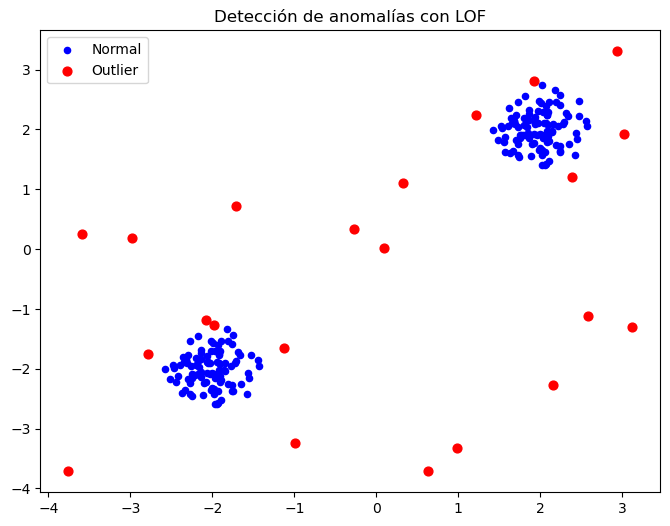

In [68]:
# Ajustar LOF
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
outliers = y_pred == -1

# Visualización
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], color='b', s=20, label='Normal')
plt.scatter(X[outliers, 0], X[outliers, 1], color='r', s=40, label='Outlier')
plt.title('Detección de anomalías con LOF')
plt.legend()
plt.show()

In [70]:
#Ejemplo dataser heart
df_heart = pd.read_csv("Data/heart.csv")
df_heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0


In [71]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df_heart[['Age','Chol']].values
y_pred = clf.fit_predict(X)

In [72]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

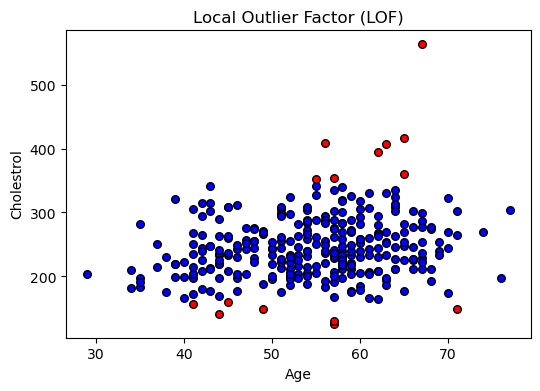

In [73]:
plt.figure(figsize=(6,4))
in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")

a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('Cholestrol');
plt.show()

- LOF Detecta outliers locales y globales. No requiere suposiciones sobre la distribución de los datos.

**Sin embargo:**
- Es sensible a la elección de k (número de vecinos).
- Puede ser costoso computacionalmente para grandes volúmenes de datos.


### Isolation Forest

Isolation Forest (IF) es similar a Random Forest y se basa en árboles de decisión. No hay etiquetas predefinidas aquí. Es un algoritmo de aprendizaje no supervisado que identifica anomalías aislando valores atípicos en los datos.

Divide los datos usando un conjunto de árboles y proporciona una puntuación de anomalía observando cuán aislado está el punto en la estructura encontrada. La puntuación de anomalía se utiliza para diferenciar los valores atípicos de las observaciones normales. Un concepto importante en este método es el número de aislamiento. El número de aislamiento es el número de divisiones necesarias para aislar un punto de datos. Este número de divisiones se determina siguiendo estos pasos:

- Se selecciona aleatoriamente un punto “a” para aislar.
- Se selecciona aleatoriamente un punto de datos “b” que esté entre el valor mínimo y máximo y que sea diferente de “a”.
- Si el valor de “b” es menor que el de “a”, “b” se convierte en el nuevo límite inferior.
- Si el valor de “b” es mayor que el de “a”, “b” se convierte en el nuevo límite superior.
- Este procedimiento se repite mientras haya puntos de datos distintos de “a” entre el límite superior e inferior.

Se requieren menos divisiones para aislar un valor atípico que para aislar un valor no atípico, es decir, un valor atípico tiene un número de aislamiento menor en comparación con un punto no atípico. Por lo tanto, un punto de datos se define como valor atípico si su número de aislamiento es menor que el umbral. El umbral se define en función del porcentaje estimado de valores atípicos en los datos, que es el punto de partida de este algoritmo de detección de valores atípicos.

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [75]:
# Generar datos normales
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X = np.r_[X + 2, X - 2]

In [76]:
# Generar outliers
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [77]:
# Unir datos
X_total = np.r_[X, X_outliers]

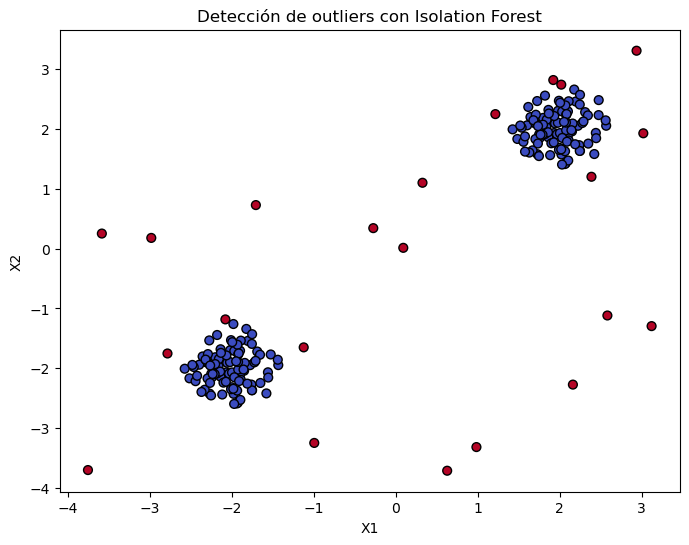

In [78]:
# Ajustar Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42) #El parámetro `contamination` indica la proporción esperada de outliers
y_pred = clf.fit_predict(X_total)

# Visualización
plt.figure(figsize=(8,6))
plt.scatter(X_total[:, 0], X_total[:, 1], c=(y_pred==-1), cmap='coolwarm', s=40, edgecolors='k')
plt.title('Detección de outliers con Isolation Forest')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

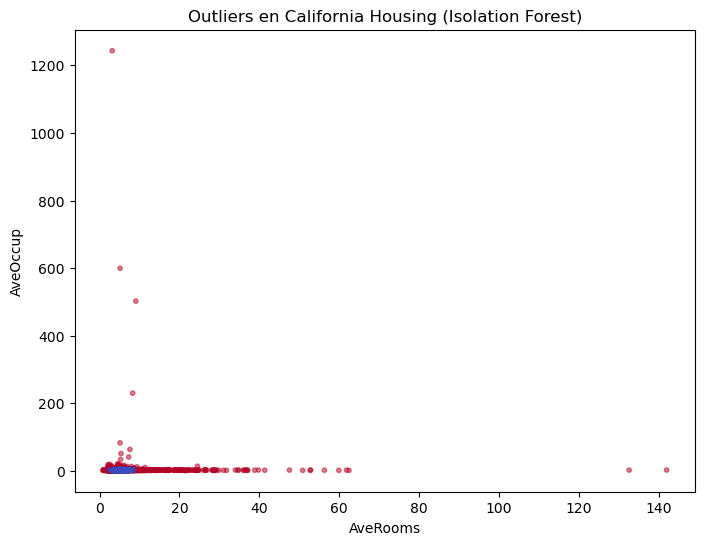

In [79]:
#Ejemplo dataset california housing
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame

# Seleccionar dos variables para visualizar
X_real = df[['AveRooms', 'AveOccup']].values

# Ajustar Isolation Forest
clf_real = IsolationForest(contamination=0.05, random_state=0)
y_pred_real = clf_real.fit_predict(X_real)

# Visualización
plt.figure(figsize=(8,6))
plt.scatter(X_real[:,0], X_real[:,1], c=(y_pred_real==-1), cmap='coolwarm', s=10, alpha=0.5)
plt.xlabel('AveRooms')
plt.ylabel('AveOccup')
plt.title('Outliers en California Housing (Isolation Forest)')
plt.show()

### DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering basado en densidad, agrupa puntos que están densamente conectados y considera como outliers (ruido) aquellos puntos que no pertenecen a ningún grupo. Es como K-means, excepto que no es necesario especificar el número de grupos de antemano.

Parámetros principales:
- `eps`: Radio de vecindad para considerar puntos vecinos.
- `min_samples`: Número mínimo de puntos para formar un cluster (incluyendo el propio punto).

In [80]:
from sklearn.cluster import DBSCAN

# Generar datos de dos clusters
rng = np.random.RandomState(0)
X1 = rng.normal(loc=[2, 2], scale=0.5, size=(50, 2))
X2 = rng.normal(loc=[-2, -2], scale=0.5, size=(50, 2))

In [81]:
# Generar outliers
X_outliers = rng.uniform(low=-6, high=6, size=(10, 2))

# Unir datos
X = np.vstack([X1, X2, X_outliers])

In [82]:
# Aplicar DBSCAN
db = DBSCAN(eps=0.7, min_samples=5)
labels = db.fit_predict(X)


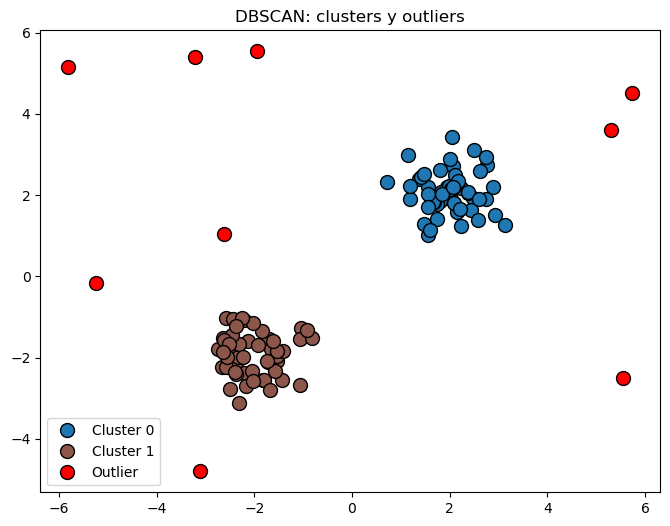

In [83]:
# Visualización
plt.figure(figsize=(8,6))
unique_labels = set(labels)
colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Outliers
        col = (1, 0, 0, 1)
        label = 'Outlier'
    else:
        label = f'Cluster {k}'
    class_member_mask = (labels == k)
    plt.plot(X[class_member_mask, 0], X[class_member_mask, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10, label=label)
plt.title('DBSCAN: clusters y outliers')
plt.legend()
plt.show()

In [84]:
# Ejemplo dataset insurance
df_3 = pd.read_csv("Data/insurance.csv")
df_3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [85]:
from sklearn.cluster import DBSCAN
X = df_3[['age','bmi']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [86]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
pd.Series(labels).value_counts() #-1 representan valores atipicos

 0    1312
-1      26
Name: count, dtype: int64

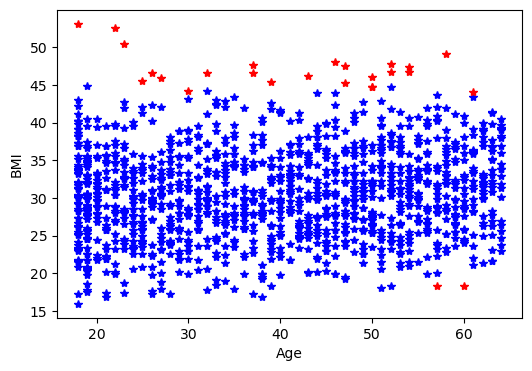

In [88]:
unique_labels = set(labels)
colors = ['blue', 'red']

plt.figure(figsize=(6,4))
for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], '*', color=color);
plt.xlabel('Age');
plt.ylabel('BMI');
plt.show()

## ¿Qué hacer después de identificar los outliers?

> **Mantenerlos:** Podemos mantener los outliers si consideramos que pueden ser representativos de un subconjunto de nuestros datos.

> **Eliminarlos:** Si estamos seguros de que los outliers provienen de un error en la entrada de los datos, como un error humano o de medida, y no podemos solucionarlo, podemos eliminarlos del conjunto de datos.

> **Imputar:** La imputación implica reemplazar los valores atípicos con otros valores como la mediana o la media. Esto se suele hacer cuando queremos conservar la mayor cantidad de datos, pero eliminando el efecto de los outliers.


In [ ]:
yout = y.reshape(-1,1)

In [ ]:
yout

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')
plt.grid()
plt.show()

In [ ]:
lin2 = LinearRegression()

In [ ]:
lin2.fit(xi, yout)

In [ ]:
lin2.intercept_[0], lin2.coef_[0][0]

In [ ]:
betaout = [lin2.intercept_[0], lin2.coef_[0][0]]
betaout

In [ ]:
# yout = b0 + b1*x
y_fit = beta[0] + beta[1]*x
y_fitout = betaout[0] + betaout[1]*x
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')
plt.plot(x,y_fit, 'b', lw=3)
plt.plot(x,y_fitout, 'g', lw=3)
plt.grid()
plt.show()